In [3]:
#Import Basic Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import os
from PIL import Image

%matplotlib inline

warnings.filterwarnings('ignore')

In [4]:
# Set base path for the Images

base = os.curdir+'//cell_images//'

In [5]:
# Total Image Count

image_count=0
for item in os.listdir(base):
    image_count += len(os.listdir(base+item))

In [6]:
image_count

27558

i.e their are 27650 images of both infected and uninfected cells.

In [7]:
len(os.listdir(base+'Parasitized'))

13779

i.e 13780 images are infected and 13780 are uninfected

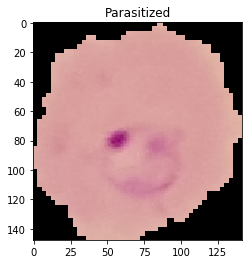

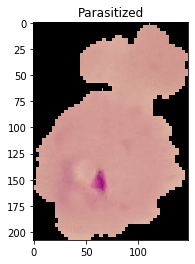

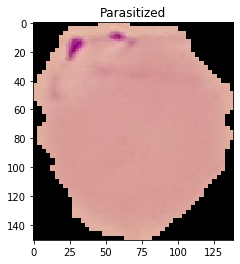

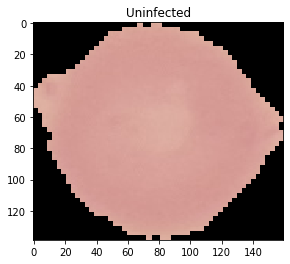

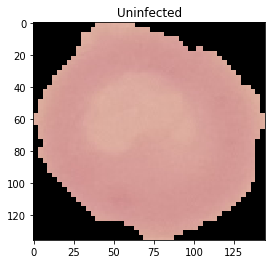

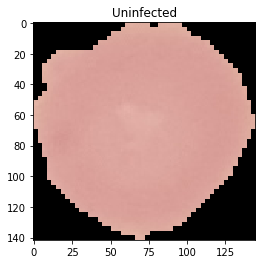

In [8]:
# Showing few of the images

for category in os.listdir(base):
    for image in os.listdir(base+'\\'+category)[:3]:
        plt.imshow(plt.imread(base+'\\'+category+'\\'+image))
        plt.title(category)
        plt.show()

In [9]:
categories = os.listdir(base)

In [10]:
# Loading the images into array

# Create Data

training_data = []
def create_training_data():
    for category in categories:
        path = os.path.join(base,category)
        class_num = categories.index(category)
        for img in os.listdir(path):
            img_arr = np.array(Image.open(path+'\\'+img).resize((64,64), Image.ANTIALIAS))  
            training_data.append([img_arr,class_num])

In [11]:
create_training_data()

In [12]:
# Shuffling the data

from random import shuffle

shuffle(training_data)

In [13]:
# Splitting them to data and labels

data = []
label = []

for train,category in training_data:
    data.append(train)
    label.append(category)

In [14]:
# Shape of the data

np.array(data).shape

(27558, 64, 64, 3)

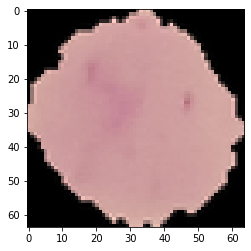

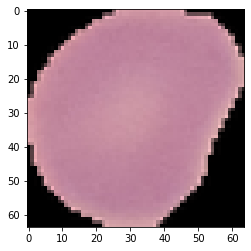

In [15]:
# Looking at first two images

for d in data[:2]:
    plt.imshow(d)
    plt.show()

In [16]:
data = np.array(data)

In [17]:
data.shape

(27558, 64, 64, 3)

In [18]:
label = np.array(label)

In [19]:
label.shape

(27558,)

In [20]:
# Splitting the Data into training set and testing set

train = data[:20000]
train_label = label[:20000]

test = data[20000:]
test_label = label[20000:]

In [21]:
import keras

Using TensorFlow backend.


In [22]:
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,Dropout,MaxPooling2D,Dense,BatchNormalization

In [23]:
# Creating the Model

model = Sequential()

In [24]:
model.add(Conv2D(36,kernel_size=3,padding='valid',input_shape=(64,64,3)))

Instructions for updating:
Colocations handled automatically by placer.


In [25]:
model.add(Conv2D(64,kernel_size=3,padding='valid',strides=2))

In [26]:
model.add(Dropout(0.05))

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [27]:
model.add(MaxPooling2D(pool_size=(2,2),strides=1))

In [28]:
model.add(Conv2D(128,kernel_size=3,padding='valid',strides=2))

In [29]:
model.add(Dropout(0.1))

In [30]:
model.add(MaxPooling2D(pool_size=(2,2),strides=1))

In [31]:
model.add(Conv2D(140,kernel_size=3,padding='same'))

In [32]:
model.add(Flatten())

In [33]:
model.add(Dropout(0.15))

In [34]:
model.add(Dense(40,activation='relu'))

In [35]:
model.add(BatchNormalization())

In [36]:
model.add(Dropout(0.2))

In [37]:
model.add(Dense(90,activation='relu'))

In [38]:
model.add(Dense(1,activation='sigmoid'))

In [39]:
# Compiling the model

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [40]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 36)        1008      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 64)        20800     
_________________________________________________________________
dropout_1 (Dropout)          (None, 30, 30, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 29, 29, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 128)       73856     
_________________________________________________________________
dropout_2 (Dropout)          (None, 14, 14, 128)       0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 128)       0         
__________

In [41]:
#defining callbacks

from keras.callbacks import EarlyStopping,ModelCheckpoint

early_stop = EarlyStopping(patience=5)
check = ModelCheckpoint('best_weights.hd5',save_best_only=True,save_weights_only=True)

In [42]:
model.fit(train,train_label,epochs=10,batch_size=500,verbose=True,callbacks=[early_stop,check],validation_split=0.2)

Instructions for updating:
Use tf.cast instead.
Train on 16000 samples, validate on 4000 samples
Epoch 1/10
16000/16000 [==============================] - 926s 58ms/step - loss: 0.6129 - acc: 0.6765 - val_loss: 1.6981 - val_acc: 0.5305
Epoch 2/10
16000/16000 [==============================] - 528s 33ms/step - loss: 0.5002 - acc: 0.7604 - val_loss: 0.7192 - val_acc: 0.6727
Epoch 3/10
16000/16000 [==============================] - 554s 35ms/step - loss: 0.3061 - acc: 0.8746 - val_loss: 0.9279 - val_acc: 0.7145
Epoch 4/10
16000/16000 [==============================] - 360s 23ms/step - loss: 0.2130 - acc: 0.9229 - val_loss: 2.1433 - val_acc: 0.4883
Epoch 5/10
16000/16000 [==============================] - 245s 15ms/step - loss: 0.2055 - acc: 0.9252 - val_loss: 0.2442 - val_acc: 0.9042
Epoch 6/10
16000/16000 [==============================] - 245s 15ms/step - loss: 0.1731 - acc: 0.9370 - val_loss: 0.2470 - val_acc: 0.9060
Epoch 7/10
16000/16000 [==============================] - 246s 15ms/s

In [43]:
model.load_weights('best_weights.hd5')

In [44]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 36)        1008      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 64)        20800     
_________________________________________________________________
dropout_1 (Dropout)          (None, 30, 30, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 29, 29, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 128)       73856     
_________________________________________________________________
dropout_2 (Dropout)          (None, 14, 14, 128)       0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 128)       0         
__________

In [48]:
model.evaluate(test[:7500],test_label[:7500])

7500/7500 [==============================] - 50s 7ms/step


[0.2331979976971944, 0.9058666666984558]

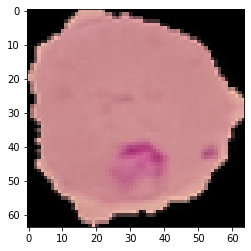

Original Class :  Paratized
Predicted Class :  Paratized





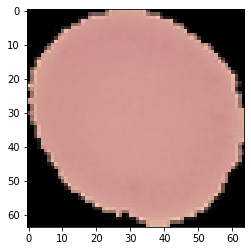

Original Class :  Uninfected
Predicted Class :  Uninfected





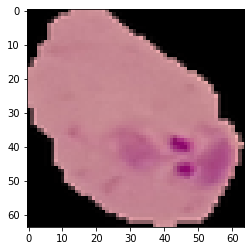

Original Class :  Paratized
Predicted Class :  Paratized





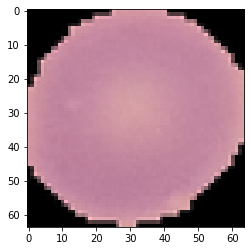

Original Class :  Uninfected
Predicted Class :  Paratized





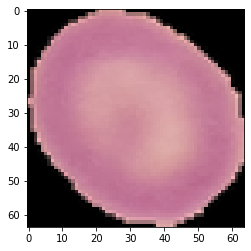

Original Class :  Uninfected
Predicted Class :  Paratized





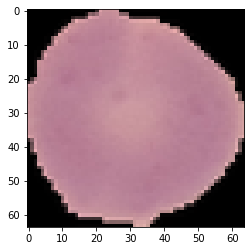

Original Class :  Uninfected
Predicted Class :  Paratized





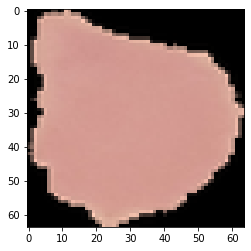

Original Class :  Uninfected
Predicted Class :  Uninfected





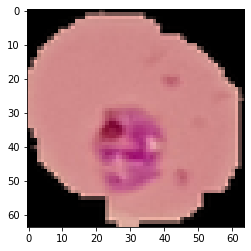

Original Class :  Paratized
Predicted Class :  Paratized





In [91]:
j=7550
for i in test[7550:]:
    plt.imshow(i)
    plt.show()
    if test_label[j]==0:
        lab = 'Paratized'
    else:
        lab = 'Uninfected'
    print('Original Class : ',lab)
    j+=1
#     print(i)
    prob = model.predict(i.reshape(1,64,64,3))[0][0]
    
    if prob<0.5:
        name = 'Paratized'
    else:
        name='Uninfected'
    print('Predicted Class : ',name)
    print('\n\n')
#     plt.show()

In [52]:
test[0].shape

(64, 64, 3)

In [65]:
model.predict(test[7550].reshape(1,64,64,3))[0][0]

0.0029131908

In [94]:
x= model.predict(test[7555].reshape(1,64,64,3))[0][0]

In [95]:
x

0.45486787

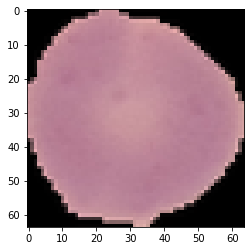

In [96]:
plt.imshow(test[7555])